,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


Missing values per column:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

Descriptive statistics:


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000



Histograms of numerical features:


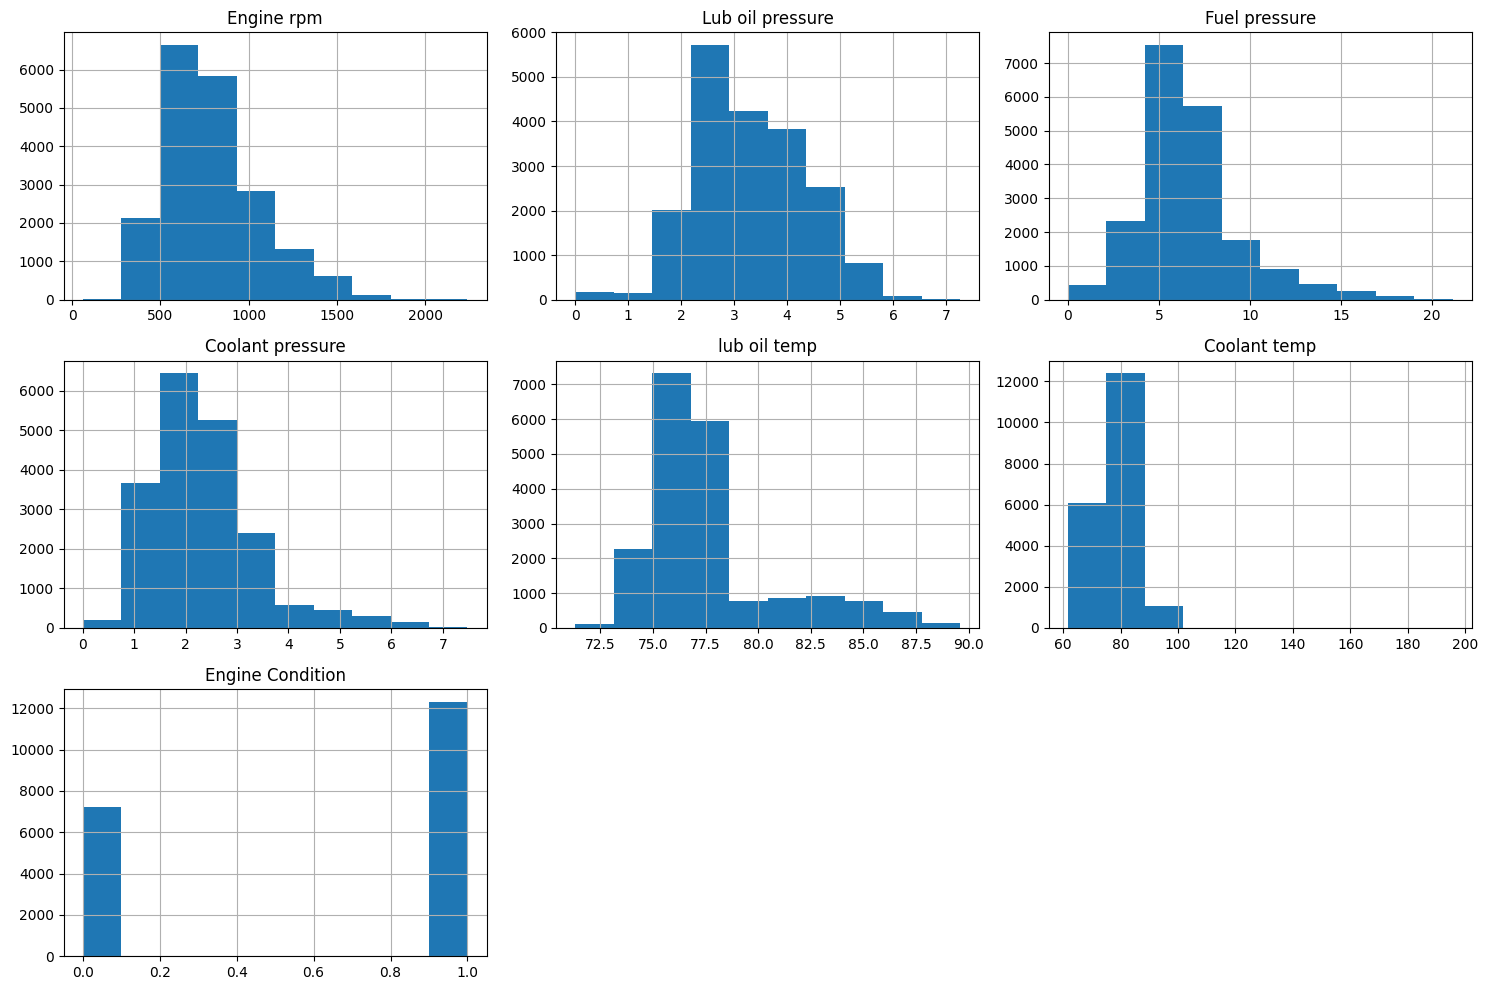


Box plots of numerical features:


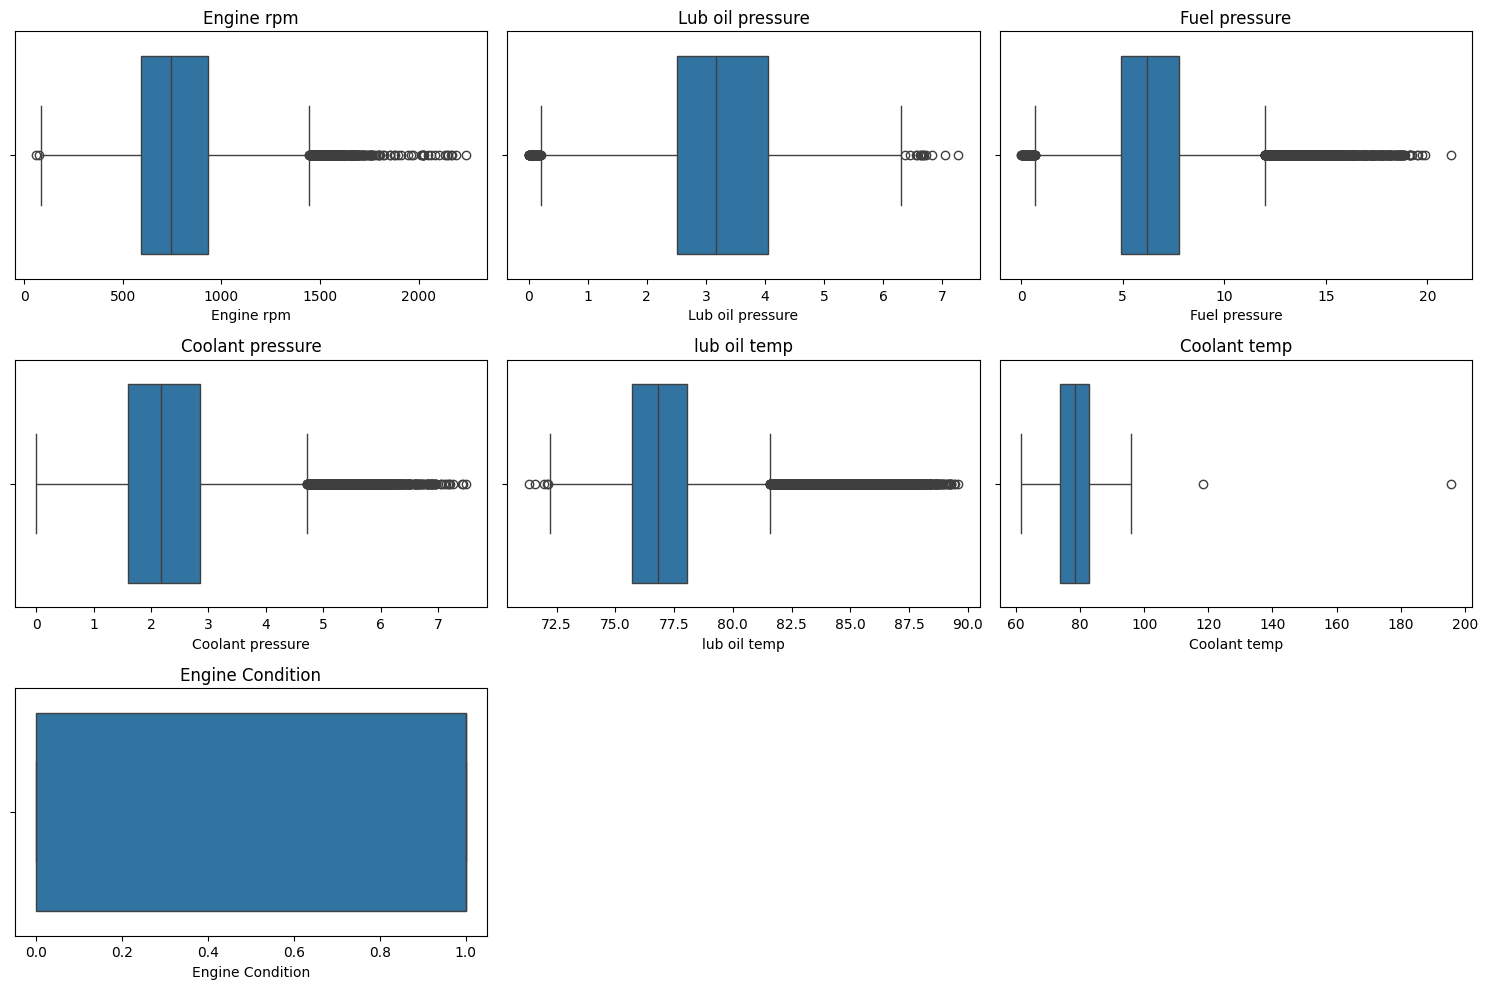


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB

Shape of original data: (19535, 6)
Shape of resampled data: (24634, 6)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,-0.340948,-0.793040,1.859980,0.814018,2.089663,0.516347
1,0.316739,-0.354506,3.454699,0.124605,-0.000799,0.647423
2,-1.013583,-0.334792,-0.037114,-1.226434,0.034988,0.196298
3,-1.189216,0.395510,4.655845,1.343252,-1.129418,-1.071894
4,-0.643634,2.319014,3.289902,-0.273186,0.242235,1.381240



Training set shape: (19707, 6)
Testing set shape: (4927, 6)

✅ Fault Detection Model Performance:
Accuracy:  0.7146
Precision: 0.7416
Recall:    0.6644
F1-score:  0.7009

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      2448
           1       0.74      0.66      0.70      2479

    accuracy                           0.71      4927
   macro avg       0.72      0.71      0.71      4927
weighted avg       0.72      0.71      0.71      4927


✅ Model and Scaler Saved Successfully!
Fault Detection Model: C:\Users\ADMIN\Desktop\CI LAB\engine_fault_system\models\fault_detector.joblib
Scaler: C:\Users\ADMIN\Desktop\CI LAB\engine_fault_system\models\feature_scaler.joblib


In [ ]:
# ==========================================
# Fault Detection Model Training & Saving
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import joblib
import os

# -----------------------------------------------------
# 1️⃣ Load and Inspect Dataset
# -----------------------------------------------------
df = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\CI LAB\\engine_fault_system\\data\\engine_data.csv")
display(df.head())

print("Missing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics:")
display(df.describe())

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("\nHistograms of numerical features:")
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

print("\nBox plots of numerical features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

print("\nData types:")
df.info()

# -----------------------------------------------------
# 2️⃣ Data Scaling & SMOTE Resampling
# -----------------------------------------------------
features_to_scale = df.columns.drop('Engine Condition')

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nShape of original data:", X.shape)
print("Shape of resampled data:", X_resampled.shape)
display(pd.DataFrame(X_resampled, columns=X.columns).head())

# -----------------------------------------------------
# 3️⃣ Train/Test Split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# -----------------------------------------------------
# 4️⃣ Train RandomForest Classifier
# -----------------------------------------------------
model = RandomForestClassifier(random_state=42, n_estimators=200)
model.fit(X_train, y_train)

# -----------------------------------------------------
# 5️⃣ Evaluate Model
# -----------------------------------------------------
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Fault Detection Model Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------------------------------
# 6️⃣ Save Model & Scaler
# -----------------------------------------------------
save_dir = "C:\\Users\\ADMIN\\Desktop\\CI LAB\\engine_fault_system\\models"
os.makedirs(save_dir, exist_ok=True)

fault_model_path = os.path.join(save_dir, "fault_detector.pkl")
scaler_path = os.path.join(save_dir, "feature_scaler.pkl")

joblib.dump(model, fault_model_path)
joblib.dump(scaler, scaler_path)

print(f"\n✅ Model and Scaler Saved Successfully!")
print(f"Fault Detection Model: {fault_model_path}")
print(f"Scaler: {scaler_path}")
